### Load the Libraries

In [32]:
# loading the library
library(ggplot2)
library(leaps)
library(glmnet)

Loading required package: Matrix

Loaded glmnet 4.1-8



### Read the Data 

In [4]:
path <- "./"
filename <- "BioProduct_2.csv"

In [5]:
# setting to current working directory
setwd(path)

In [6]:
# reading the csv file
bio_prod_data <- read.csv(filename)
head(bio_prod_data, 5)

,Yield,Material_1,Material_2,Material_3,Material_4,Material_5,Material_6,Material_7,Material_8,Material_9,⋯,Process_1,Process_2,Process_3,Process_4,Process_5,Process_6,Process_7,Process_8,Process_9,Process_10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,42.44,8.01,60.97,67.48,14.65,19.36,53.14,19.04,12.55,3.46,⋯,0.0,1032.2,210.0,46.57,9.6,9.8,34.0,34.0,11.2,3
2,42.03,8.01,60.97,67.48,14.65,19.36,53.14,19.04,12.55,3.46,⋯,0.0,1003.6,207.1,45.07,9.4,10.2,34.8,34.8,11.1,2
3,41.42,8.01,60.97,67.48,14.65,19.36,53.14,19.04,12.55,3.46,⋯,0.0,1014.6,213.3,44.92,9.6,10.2,34.8,34.8,11.1,2
4,42.49,7.47,63.33,72.25,14.02,17.91,54.66,18.22,12.80,3.05,⋯,10.7,1027.5,205.7,44.96,9.0,10.0,34.6,33.9,11.3,2
5,43.57,6.12,58.36,65.31,15.17,21.79,51.23,18.30,12.13,3.78,⋯,12.0,1016.8,208.9,45.32,9.5,10.6,34.0,33.4,11.4,2


### EDA 

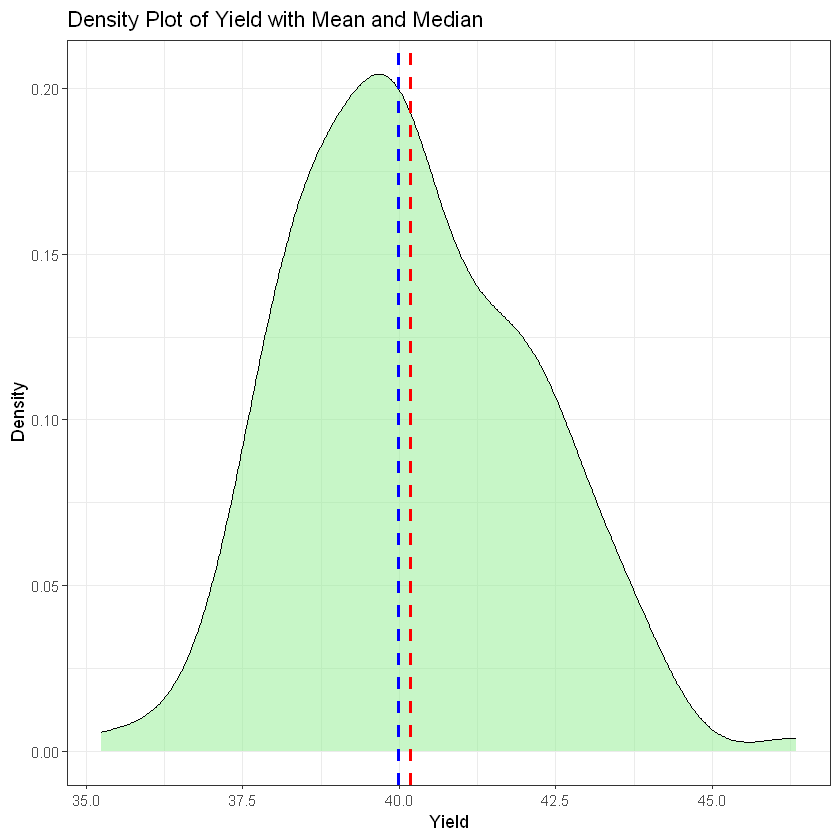

In [8]:
#density plot for the numerical variable "Yield"
ggplot(data = bio_prod_data, aes(x = Yield)) +
  geom_density(fill = "lightgreen", alpha = 0.5) +
  geom_vline(aes(xintercept = mean(Yield)), color = "red", linetype = "dashed", linewidth = 1) +
  geom_vline(aes(xintercept = median(Yield)), color = "blue", linetype = "dashed", linewidth = 1) +
  labs(x = "Yield", y = "Density", title = "Density Plot of Yield with Mean and Median") +
  theme_bw()

Warning message:
"The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


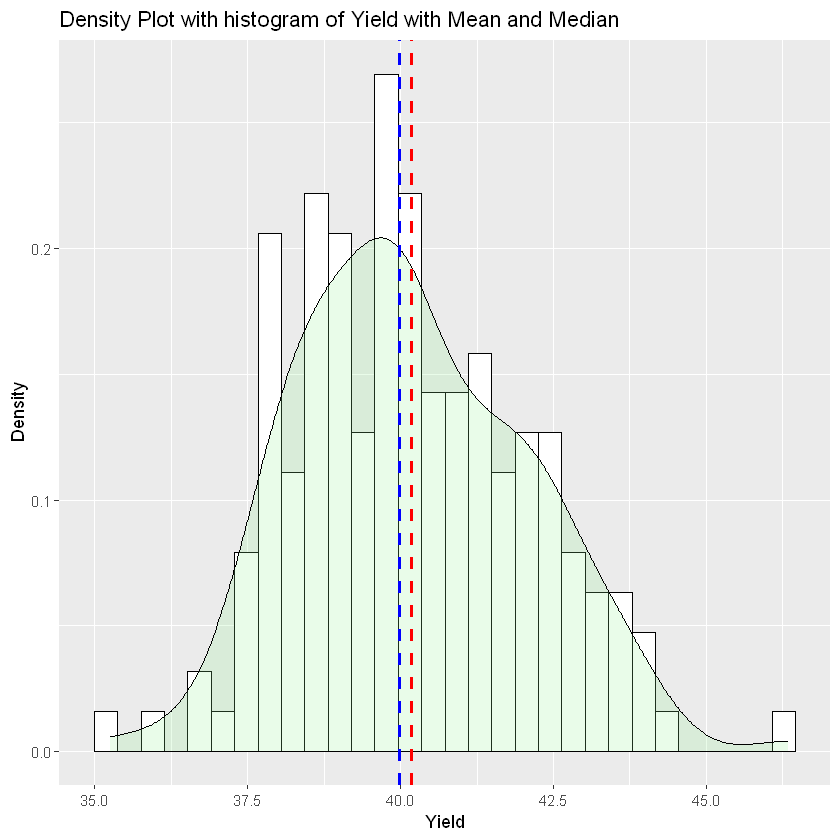

In [9]:
# density plot with histogram for the numerical variable "Yield"
ggplot(bio_prod_data, aes(x=Yield)) + 
  geom_histogram(aes(y=..density..), colour="black", fill="white")+
  geom_density(alpha=.2, fill="lightgreen") +
  # Adding a vertical line for the mean
  geom_vline(aes(xintercept = mean(Yield)), color = "red", linetype = "dashed", linewidth = 1) +
  # Adding a vertical line for the median
  geom_vline(aes(xintercept = median(Yield)), color = "blue", linetype = "dashed", linewidth = 1) +
  # labels for the x and y axes
  labs(x = "Yield", y = "Density", title="Density Plot with histogram of Yield with Mean and Median")

### Train Test Split - 75 and 25% Ratio 

In [10]:
# random number to reproduce
set.seed(123)
# splitting the data into 75% train and 25% test set
train_index_1 <- sample(nrow(bio_prod_data), nrow(bio_prod_data)*0.75)
train_data_1 <- bio_prod_data[train_index_1,]
test_data_1 <- bio_prod_data[-train_index_1,]

In [11]:
head(train_data_1, 5)

,Yield,Material_1,Material_2,Material_3,Material_4,Material_5,Material_6,Material_7,Material_8,Material_9,⋯,Process_1,Process_2,Process_3,Process_4,Process_5,Process_6,Process_7,Process_8,Process_9,Process_10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
159,38.42,5.27,52.45,64.09,10.84,18.10,46.02,16.35,12.22,1.77,⋯,11.4,1029.0,205.9,47.70,10.5,10.3,33.5,33.5,0.0,1
14,41.50,6.23,62.93,69.74,11.80,20.54,54.57,18.89,12.82,2.30,⋯,11.3,1120.7,207.8,46.44,9.4,10.2,35.3,35.3,11.3,3
50,40.15,6.87,57.33,71.52,13.22,15.62,50.85,17.74,13.16,2.91,⋯,9.7,1003.8,206.8,48.84,8.7,10.8,33.6,33.1,10.1,3
118,43.42,6.08,52.89,66.72,11.23,19.06,47.29,17.03,12.96,2.49,⋯,11.2,994.7,207.3,46.95,8.9,9.8,34.3,33.2,0.0,3
43,42.96,6.95,60.31,73.97,12.42,19.05,52.31,17.64,13.28,2.75,⋯,12.2,977.8,227.4,46.03,9.4,9.1,32.6,32.6,10.7,1


In [12]:
head(test_data_1, 5)

,Yield,Material_1,Material_2,Material_3,Material_4,Material_5,Material_6,Material_7,Material_8,Material_9,⋯,Process_1,Process_2,Process_3,Process_4,Process_5,Process_6,Process_7,Process_8,Process_9,Process_10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,42.44,8.01,60.97,67.48,14.65,19.36,53.14,19.04,12.55,3.46,⋯,0.0,1032.2,210.0,46.57,9.6,9.8,34.0,34.0,11.2,3
2,42.03,8.01,60.97,67.48,14.65,19.36,53.14,19.04,12.55,3.46,⋯,0.0,1003.6,207.1,45.07,9.4,10.2,34.8,34.8,11.1,2
3,41.42,8.01,60.97,67.48,14.65,19.36,53.14,19.04,12.55,3.46,⋯,0.0,1014.6,213.3,44.92,9.6,10.2,34.8,34.8,11.1,2
10,42.04,7.17,61.23,70.01,13.36,18.67,52.83,17.88,12.62,2.90,⋯,10.3,983.1,209.4,46.24,9.0,9.5,35.8,35.8,11.5,3
15,41.21,7.13,60.30,68.18,13.80,20.72,52.49,18.68,12.75,3.25,⋯,11.1,1073.6,207.1,45.40,9.6,10.2,35.4,35.5,11.1,1


### Linear Regression 

In [13]:
# Linear regression on 75%-25% split
L1 <- lm(Yield ~ ., data = train_data_1)

In [14]:
# summary of the regression model fit L1
summary(L1)


Call:
lm(formula = Yield ~ ., data = train_data_1)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6094 -0.8524 -0.0609  0.7872  3.3593 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) 51.067934  22.574702   2.262   0.0258 *
Material_1   0.362147   0.446685   0.811   0.4194  
Material_2  -0.215189   0.173053  -1.243   0.2165  
Material_3   0.057676   0.286250   0.201   0.8407  
Material_4   0.695826   0.658938   1.056   0.2935  
Material_5   0.025919   0.125409   0.207   0.8367  
Material_6   0.184642   0.294187   0.628   0.5316  
Material_7   1.092138   0.692697   1.577   0.1180  
Material_8  -1.172314   1.703374  -0.688   0.4929  
Material_9  -1.474653   1.704075  -0.865   0.3889  
Material_10 -0.058449   0.089688  -0.652   0.5161  
Process_1    0.059128   0.206779   0.286   0.7755  
Process_2   -0.010061   0.006611  -1.522   0.1311  
Process_3    0.116681   0.056545   2.063   0.0416 *
Process_4    0.026545   0.213338   0.124   0.9012  
Process

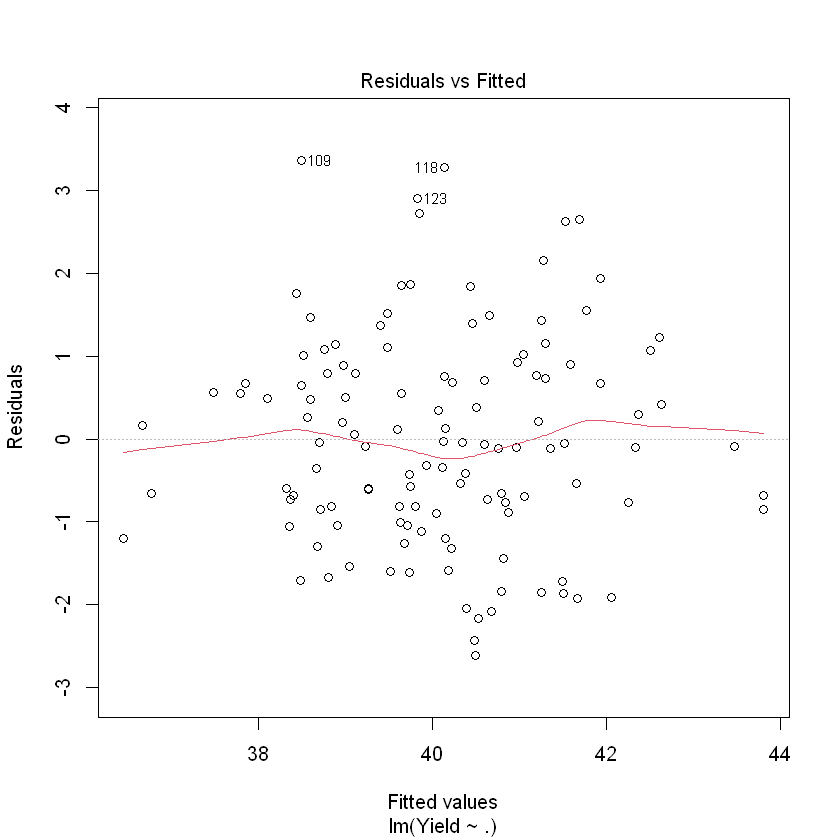

In [15]:
# residuals vs fitted values plot
plot(L1, which = 1)

In [16]:
# Linear regression model L2 on predictor "Process_3"
L2 <- lm(Yield ~ Process_3, data = train_data_1)

In [17]:
# summary of the regression model fit L2
summary(L2)


Call:
lm(formula = Yield ~ Process_3, data = train_data_1)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5894 -1.3011 -0.0998  1.1465  4.2764 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -18.61475   11.92349  -1.561    0.121    
Process_3     0.28303    0.05748   4.924 2.72e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.743 on 121 degrees of freedom
Multiple R-squared:  0.1669,	Adjusted R-squared:   0.16 
F-statistic: 24.24 on 1 and 121 DF,  p-value: 2.718e-06


In [18]:
# Predict test data using regression model L2
test_data_1$predicted_yield <- predict(L2, newdata = test_data_1)

### Linear Regression - Model Performance 

In [19]:
# r squared for model L2
R2_L2 <- 1 - (sum((test_data_1$Yield - test_data_1$predicted_yield)^2) / sum((test_data_1$Yield - mean(test_data_1$Yield))^2))

# root mean square error for model L2
RMSE_L2 <- sqrt(mean((test_data_1$Yield - test_data_1$predicted_yield)^2))

# adjusted r squared for model L2
adjusted_r2_L2 <- 1 - ((1 - R2_L2) * (nrow(test_data_1) - 1)) / (nrow(test_data_1) - 1 - 1)

# F statistic for L2
anova_table <- anova(L2)
f_statistic <- anova_table$F[1]

# print the metrics
print(paste0("R Squared for the predictions made using model L2: ", R2_L2))
print(paste0("Root mean square error for the predictions made using model L2: ", RMSE_L2))
print(paste0("Adjusted R squared for the predictions made using model L2: ", adjusted_r2_L2))
print(paste0("F-Statistics for the predictions made using model L2: ", f_statistic))

[1] "R Squared for the predictions made using model L2: 0.071794788862485"
[1] "Root mean square error for the predictions made using model L2: 1.70978264316186"
[1] "Adjusted R squared for the predictions made using model L2: 0.0485896585840472"
[1] "F-Statistics for the predictions made using model L2: 24.2413792487603"


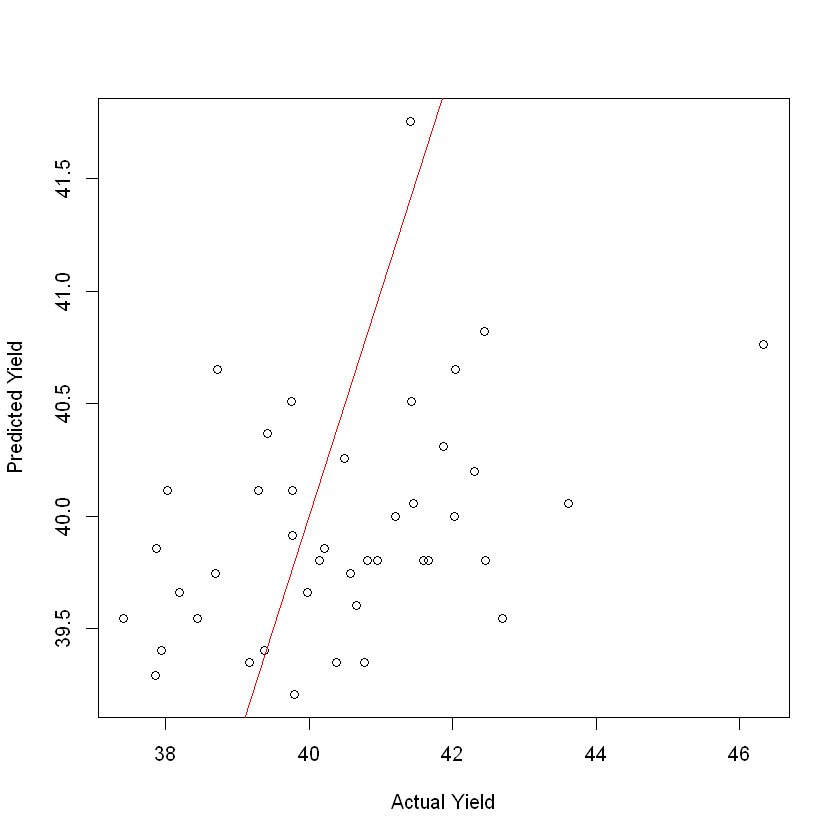

In [20]:
# Plot of actual vs predicted yield using L2
plot(test_data_1$Yield, test_data_1$predicted_yield, xlab = "Actual Yield", ylab = "Predicted Yield")
abline(0, 1, col = "red")

In [22]:
# Split data into train and test sets
set.seed(123)
train_index_2 <- sample(nrow(bio_prod_data), nrow(bio_prod_data)*0.8)
train_data_2 <- bio_prod_data[train_index_2, ]
test_data_2 <- bio_prod_data[-train_index_2, ]

### Subset Selection Method 

In [23]:
# Perform best subset .selection on the training data
best_subset_model <- regsubsets(Yield ~ ., data = train_data_2, nvmax = 12)
summ_best_subset_model = summary(best_subset_model)

In [24]:
# Get summary information for the models
summary(best_subset_model)

Subset selection object
Call: regsubsets.formula(Yield ~ ., data = train_data_2, nvmax = 12)
20 Variables  (and intercept)
            Forced in Forced out
Material_1      FALSE      FALSE
Material_2      FALSE      FALSE
Material_3      FALSE      FALSE
Material_4      FALSE      FALSE
Material_5      FALSE      FALSE
Material_6      FALSE      FALSE
Material_7      FALSE      FALSE
Material_8      FALSE      FALSE
Material_9      FALSE      FALSE
Material_10     FALSE      FALSE
Process_1       FALSE      FALSE
Process_2       FALSE      FALSE
Process_3       FALSE      FALSE
Process_4       FALSE      FALSE
Process_5       FALSE      FALSE
Process_6       FALSE      FALSE
Process_7       FALSE      FALSE
Process_8       FALSE      FALSE
Process_9       FALSE      FALSE
Process_10      FALSE      FALSE
1 subsets of each size up to 12
Selection Algorithm: exhaustive
          Material_1 Material_2 Material_3 Material_4 Material_5 Material_6
1  ( 1 )  " "        " "        " "        "

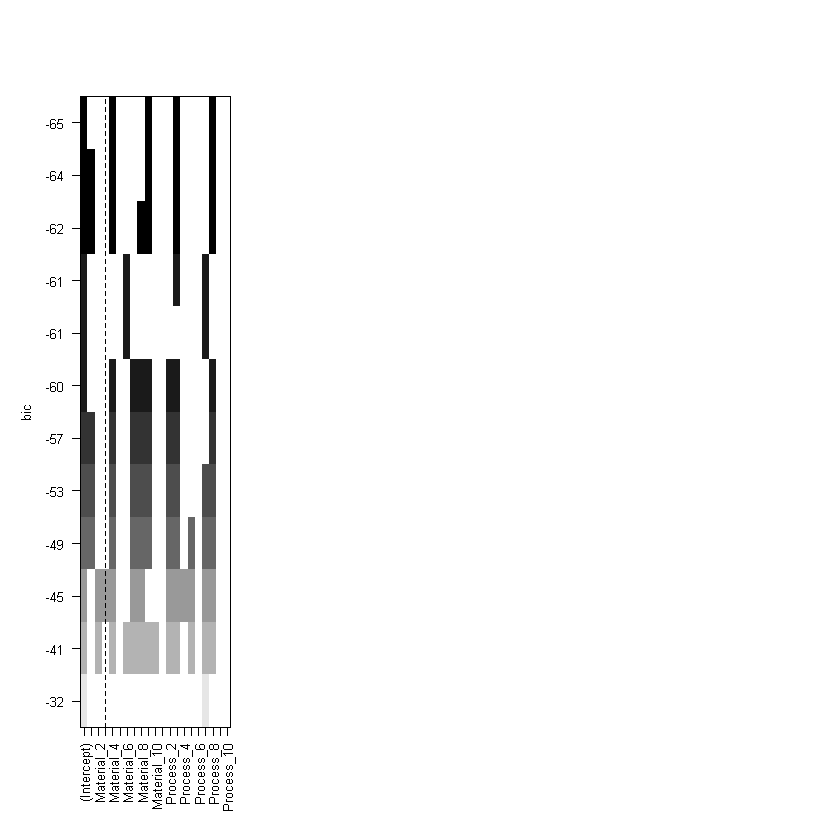

In [25]:
# BIC Plot, R2, and adjusted R2 for each model
par(mfrow = c(1, 3))
plot(best_subset_model, scale = "bic")
min_bic <- which.min(summary(best_subset_model)$bic)
abline(v = min_bic, lty = 2)

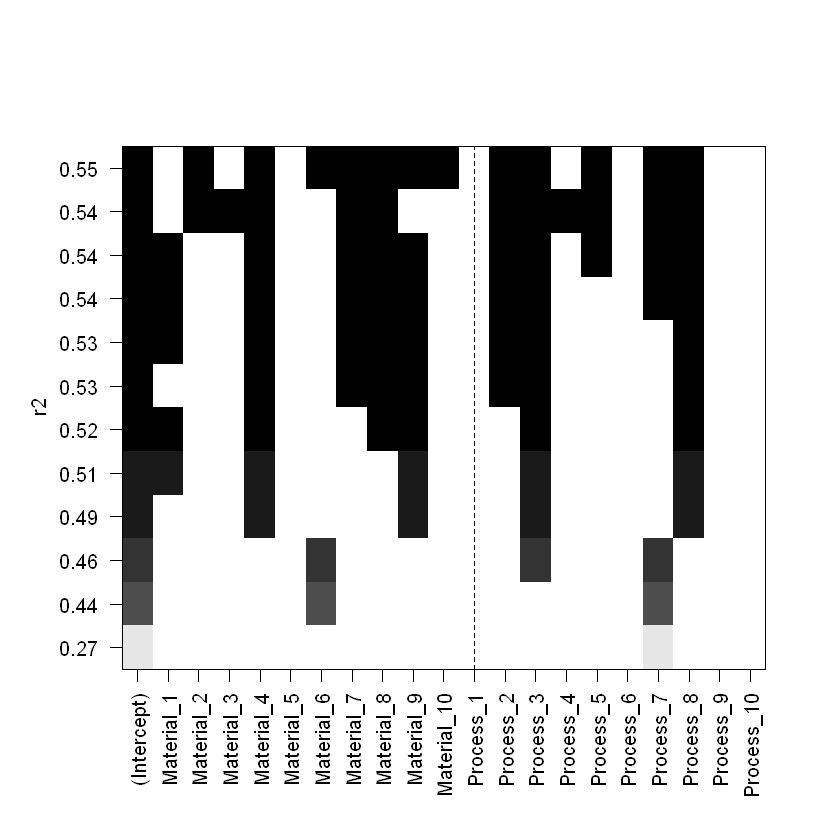

In [26]:
# R2 Plot
plot(best_subset_model, scale = "r2")
max_r2 <- which.max(summary(best_subset_model)$rsq)
abline(v = max_r2, lty = 2)

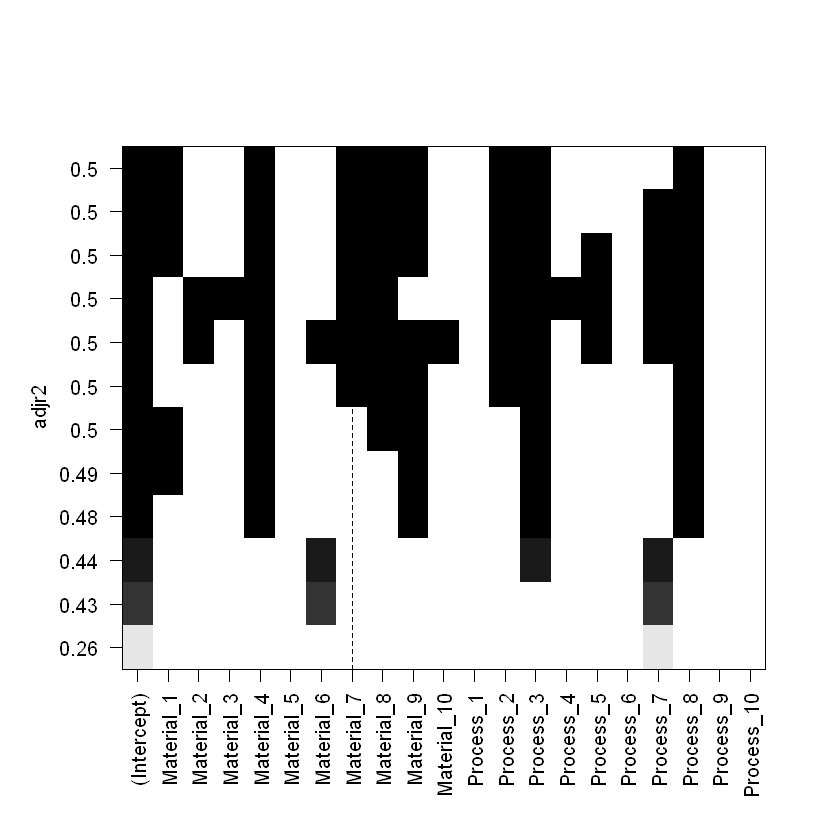

In [27]:
# Adjusted R2 plot
plot(best_subset_model, scale = "adjr2")
max_adjr2 <- which.max(summary(best_subset_model)$adjr2)
abline(v = max_adjr2, lty = 2)

In [28]:
print(paste0("Minimum BIC = ", min_bic))
print(paste0("Maximum R2 = ", max_r2))
print(paste0("Maximum Adjusted R2 = ", max_adjr2))

[1] "Minimum BIC = 4"
[1] "Maximum R2 = 12"
[1] "Maximum Adjusted R2 = 8"


In [29]:
# best subset model based on BIC, R2, and adjusted R2
summ_best_subset_model$bic[min_bic]
summ_best_subset_model$rsq[max_r2]
summ_best_subset_model$adjr2[max_adjr2]

[1] -65.30432

[1] 0.5469347

[1] 0.5045595

### Linear Regression with Subset Selection Method 

In [30]:
# coefficients for the best model based on BIC
LM_equation=Yield~Material_1+Material_2+Material_3+Material_4+Material_5+Material_6+Material_7+
  Material_8+Material_9+Material_10+Process_1+Process_2+Process_3+Process_4+Process_5+Process_6+
  Process_7+Process_8+Process_9+Process_10
best_model<-lm(LM_equation, data=train_data_2[, c("Yield",names(train_data_2)[summ_best_subset_model$which[min_bic]])])
best_coeff=coef(summary(best_model))
best_coeff

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),42.357988765,20.186443915,2.09833832,0.03814385
Material_1,0.238131574,0.428167506,0.55616452,0.57921782
Material_2,-0.206862624,0.165611308,-1.24908514,0.21426166
Material_3,-0.010193057,0.267740041,-0.03807072,0.96969968
Material_4,0.788417030,0.620213781,1.27120205,0.20631419
Material_5,0.042207399,0.121892351,0.34626782,0.72979694
Material_6,0.230820523,0.273688425,0.84336969,0.40083548
Material_7,1.059728611,0.650515098,1.62906075,0.10613503
Material_8,-0.804785467,1.599974073,-0.50299907,0.61596154
Material_9,-1.665031628,1.608680726,-1.03502926,0.30290493


In [31]:
# predicting with best model
test_predictions=predict(best_model, data=test_data_2)
rmse=sqrt((mean(test_predictions-test_data_2$Yield)^2))
rmse

[1] 0.4603788

### Ridge Regression 

In [33]:
# random seed for reproducible
set.seed(123)

# train and test split (80% and 20%)
train_index_3 <- sample(nrow(bio_prod_data), nrow(bio_prod_data)*0.8)
train_data_3 <- bio_prod_data[train_index_3, ]
test_data_3 <- bio_prod_data[-train_index_3, ]

In [34]:
# best lambda using cross validation for Ridge regression
cv_ridge <- cv.glmnet(x = as.matrix(train_data_3[, -1]), y = train_data_3$Yield, 
                      alpha = 0, nfolds = 10)
best_lambda_ridge <- cv_ridge$lambda.min
print(paste0("Best Lambda Value for Ridge Regression = ", best_lambda_ridge))

[1] "Best Lambda Value for Ridge Regression = 0.62854797688942"


In [35]:
# fit ridge regression with the choose best lambda
ridge_model <- glmnet(x = as.matrix(train_data_3[, -1]), y = train_data_3$Yield, 
                      alpha = 0, lambda = best_lambda_ridge)

In [36]:
# predict using ridge regression model
ridge_preds <- predict(ridge_model, newx = as.matrix(test_data_3[, -1]))

In [37]:
# evaluate the model
ridge_r2 <- cor(test_data_3$Yield, ridge_preds)^2
ridge_rmse <- sqrt(mean((test_data_3$Yield - ridge_preds)^2))
ridge_nonzero <- sum(ridge_model$beta != 0)

print(paste0("RMSE value : ", ridge_rmse))
print(paste0("R-Squared : ", ridge_r2))
print(paste0("Non-Zero : ", ridge_nonzero))

[1] "RMSE value : 1.18456500677513"
[1] "R-Squared : 0.634004183592839"
[1] "Non-Zero : 20"


### Lasso Regression 

In [38]:
# best lambda using cross validation for Lasso regression
cv_lasso <- cv.glmnet(x = as.matrix(train_data_3[, -1]), y = train_data_3$Yield, 
                      alpha = 1, nfolds = 10)
best_lambda_lasso <- cv_lasso$lambda.min
print(paste0("Best Lambda Value for Lasso Regression = ", best_lambda_lasso))

[1] "Best Lambda Value for Lasso Regression = 0.0955337036241874"


In [39]:
# fit ridge regression with the choose best lambda
lasso_model <- glmnet(x = as.matrix(train_data_3[, -1]), y = train_data_3$Yield, alpha = 1, 
                      lambda = best_lambda_lasso)
# predict using ridge regression model
lasso_preds <- predict(lasso_model, newx = as.matrix(test_data_3[, -1]))

In [40]:
# evaluate the model
lasso_r2 <- cor(test_data_3$Yield, lasso_preds)^2
lasso_rmse <- sqrt(mean((test_data_3$Yield - lasso_preds)^2))
lasso_nonzero <- sum(lasso_model$beta != 0)

print(paste0("RMSE value : ", lasso_rmse))
print(paste0("R-Squared : ", lasso_r2))
print(paste0("Non-Zero : ", lasso_nonzero))

[1] "RMSE value : 1.1795841075145"
[1] "R-Squared : 0.64326882282783"
[1] "Non-Zero : 9"
